# True Car listing 2017

In [91]:
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

In [92]:
# Read CSV file
df = pd.read_csv("D:/DataProject/Cars.csv", index_col='Vehicle_ID')

In [93]:
# Checking row and columns
print(df.shape)
df.head()

(1047154, 9)


,VIN,Make,Model,Year,Mileage,City,State,Region,Price
Vehicle_ID,,,,,,,,,
1,KL4CJBSBXFB267643,Buick,EncoreConvenience,2015,18681,Jefferson City,MO,Midwest,16472
2,KL4CJASB5FB245057,Buick,EncoreFWD,2015,27592,Highland,IN,Midwest,15749
3,KL4CJCSB0FB264921,Buick,EncoreLeather,2015,13650,Boone,NC,Southeast,16998
4,KL4CJASB4FB217542,Buick,EncoreFWD,2015,25195,New Orleans,LA,Southeast,15777
5,KL4CJBSB3FB166881,Buick,EncoreConvenience,2015,22800,Las Vegas,NV,Rockies,16784


In [94]:
# Double check missing value
import numpy as np

for col in df.columns:
    null_amount = np.mean(df[col].isna()*100)
    print(f'{col} - {null_amount}%')

VIN - 0.0%
Make - 0.0%
Model - 0.0%
Year - 0.0%
Mileage - 0.0%
City - 0.0%
State - 0.0%
Region - 0.0%
Price - 0.0%


In [95]:
df.describe()

,Year,Mileage,Price
count,1.047154e+06,1.047154e+06,1.047154e+06
mean,2.013301e+03,5.294083e+04,2.104144e+04
std,3.418435e+00,4.176700e+04,1.309417e+04
min,1.997000e+03,5.000000e+00,1.500000e+03
25%,2.012000e+03,2.433600e+04,1.299200e+04
50%,2.014000e+03,4.076100e+04,1.799500e+04
75%,2.016000e+03,7.273000e+04,2.658000e+04
max,2.017000e+03,2.856196e+06,4.995000e+05


In [96]:
df.dtypes

VIN        object
Make       object
Model      object
Year        int64
Mileage     int64
City       object
State      object
Region     object
Price       int64
dtype: object

## Plot fuction for visualize


In [97]:
# Create plot

def countplot(X, dataset, ax):
    plot = sns.countplot(x=X, data=dataset, ax=ax)
    for p in plot.patches:
        plot.annotate("{:.2%}".format(p.get_height()/len(dataset)),
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    fontsize=12,
                    xytext=(0,5),
                    textcoords='offset points',
                    ha='center'
                    )

def barplot(X, Y, dataset, ax):
    plot = sns.barplot(x=X, y=Y, data=dataset, ax=ax)
    for p in plot.patches:
        plot.annotate("{:.2%}".format(p.get_height()/len(df)),
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    fontsize=12,
                    xytext=(0,7),
                    textcoords='offset points',
                    ha='center')

def hist(X, dataset, rang, ax):
    ax.hist(x=X, data=dataset, bins=20, range=(0, rang))
    ax.axvline(dataset[X].mean(), color='black', linestyle='dashed', linewidth=1)
    ax.axvline(dataset[X].median(), color='red', linestyle='dashed', linewidth=1)
    ax.text(dataset[X].mean()*1.1, 200000, "Average: {:.0f}".format(dataset[X].mean()))
    ax.text(dataset[X].mean()*1.1, 180000, "Median: {:.0f}".format(dataset[X].median()), color='red')

def plot_detail(title, font, xlabel, ylabel, ax):
    ax.set_title(title, fontsize = font)
    ax.set_xlabel(xlabel, fontsize = font)
    ax.set_ylabel(ylabel, fontsize = font)
    ax.tick_params(labelsize = font)


## Exploring Data Analysis

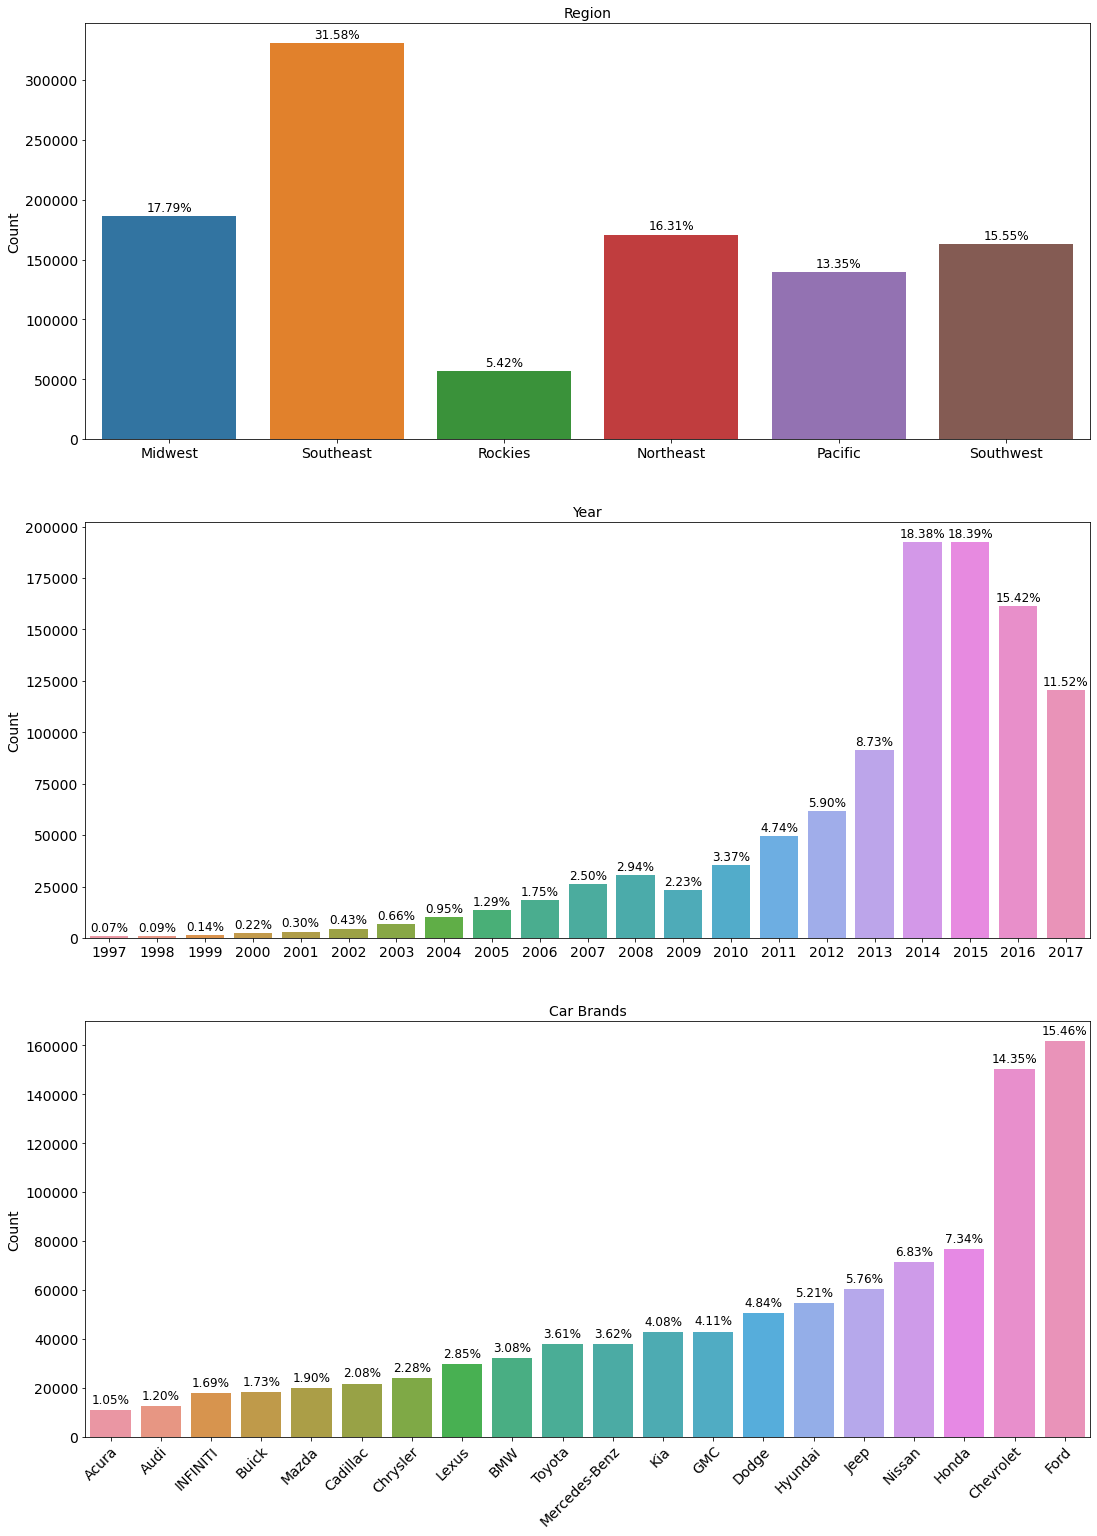

In [98]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (18, 26))

countplot('Region', df, ax1)
plot_detail('Region', 14, None, 'Count', ax1)

countplot('Year', df, ax2)
plot_detail('Year', 14, None, 'Count', ax2)

top20 = df.groupby('Make')['VIN'].count().sort_values().tail(20)
barplot(top20.index, top20.values, top20, ax3)
plot_detail('Car Brands', 14, None, 'Count', ax3)
ax3.set_xticklabels(top20.index, rotation=45, ha='right', rotation_mode='anchor')

plt.show()

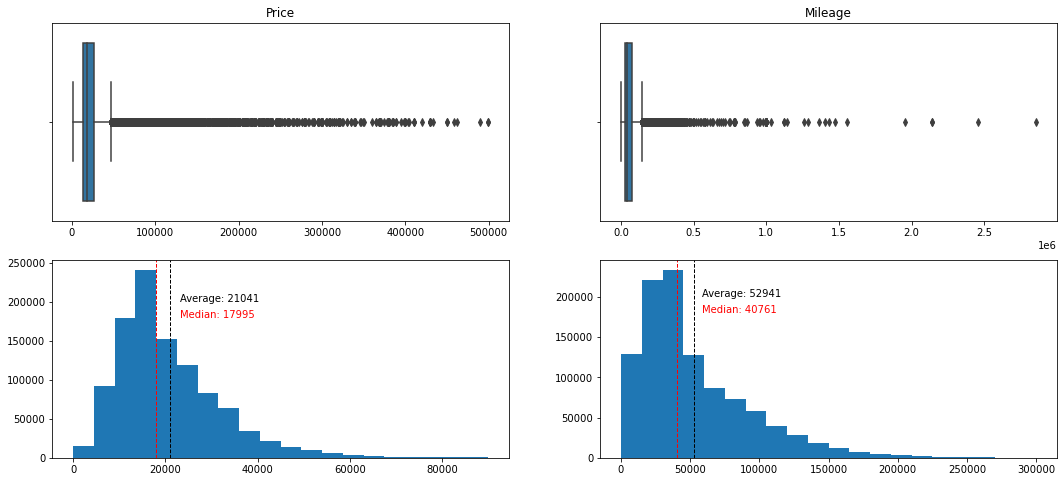

In [99]:
fig, ax = plt.subplots(2, 2, figsize = (18, 8))

sns.boxplot(x='Price', data=df, ax=ax[0,0])
sns.boxplot(x='Mileage', data=df, ax=ax[0,1])
hist('Price', df, 90000, ax[1,0])
hist('Mileage', df, 300000, ax[1,1])

ax[0,0].set_title('Price')
ax[0,1].set_title('Mileage')
ax[0,1].set_xlabel(None)
ax[0,0].set_xlabel(None)
plt.show()

In [100]:
# Median is helpful than average or mean when have million of rows and a graph is skewed to right
df[['Year', 'Mileage', 'Price']].median()

Year        2014.0
Mileage    40761.0
Price      17995.0
dtype: float64

## Correlation

In [101]:
df.head()

,VIN,Make,Model,Year,Mileage,City,State,Region,Price
Vehicle_ID,,,,,,,,,
1,KL4CJBSBXFB267643,Buick,EncoreConvenience,2015,18681,Jefferson City,MO,Midwest,16472
2,KL4CJASB5FB245057,Buick,EncoreFWD,2015,27592,Highland,IN,Midwest,15749
3,KL4CJCSB0FB264921,Buick,EncoreLeather,2015,13650,Boone,NC,Southeast,16998
4,KL4CJASB4FB217542,Buick,EncoreFWD,2015,25195,New Orleans,LA,Southeast,15777
5,KL4CJBSB3FB166881,Buick,EncoreConvenience,2015,22800,Las Vegas,NV,Rockies,16784


In [102]:
df_numerized = df.copy()

# Drop unused Columns
df_numerized.drop(['City', 'State', 'VIN', 'Model'], axis=1, inplace=True)

# Numerize category variable
for col in df_numerized.columns:
    if(df_numerized[col].dtype == 'object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes

df_numerized.head()

,Make,Year,Mileage,Region,Price
Vehicle_ID,,,,,
1,7,2015,18681,0,16472
2,7,2015,27592,0,15749
3,7,2015,13650,4,16998
4,7,2015,25195,4,15777
5,7,2015,22800,3,16784


In [103]:
# Region Category Code
region_code = df_numerized['Region'].unique()
region_name = df['Region'].unique()

RegionCode = pd.DataFrame(list(zip(region_code, region_name)), \
            columns=['Code', 'Region']).set_index('Code').sort_values('Code', ascending=True)

RegionCode

,Region
Code,
0,Midwest
1,Northeast
2,Pacific
3,Rockies
4,Southeast
5,Southwest


In [104]:
# Car Brand Category Code
make_code = df_numerized['Make'].unique()
make_name = df['Make'].unique()

MakeCode = pd.DataFrame(list(zip(make_code, make_name)),
             columns=['Code', 'Brand']).set_index('Code').sort_values('Code', ascending=True)

MakeCode.sample(5)

,Brand
Code,
6,Bentley
53,Tesla
38,Mercedes-Benz
28,Lamborghini
0,AM


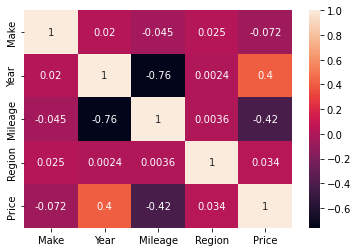

In [105]:
corr_matrix = df_numerized.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Preparing Model for Predict Price
* Since I'm don't sure should I remove the Make variable or not, So I decided to test both

### With Make Variable

In [106]:
# Preprocessing Data
from sklearn.preprocessing import StandardScaler
 
X= df_numerized.drop(['Price'], axis=1)
y= df_numerized['Price']

scaler = StandardScaler()
X[X.columns[:]] = scaler.fit_transform(X) ## fit() -- > .transform() to scale
X.sample(5)

,Make,Year,Mileage,Region
Vehicle_ID,,,,
895839,0.402393,0.789404,-0.924075,-1.474233
495364,-0.950507,0.204341,0.248023,-0.914378
539033,-0.950507,-1.550849,2.183906,0.765187
541486,-0.950507,-0.088190,1.047530,-0.354523
779263,-0.048573,0.204341,0.327200,-0.914378


In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)
print(f'Train X dataset shape: {X_train.shape} \nTest X dataset shape: {X_test.shape}')
print(f'Train y dataset shape: {y_train.shape} \nTest y dataset shape: {y_test.shape}')

Train X dataset shape: (785365, 4) 
Test X dataset shape: (261789, 4)
Train y dataset shape: (785365,) 
Test y dataset shape: (261789,)


#### Multiple Regression Model

In [108]:
from sklearn import linear_model

# Fit Multiple Regression Model
linear = linear_model.LinearRegression()
linear.fit(X, y)

y_pred_linear = linear.predict(X_test)

In [109]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE

# R2 Score
r2_linear_make = r2_score(y_test, y_pred_linear)
# RMSE
RMSE_linear = np.sqrt(MSE(y_test, y_pred_linear))

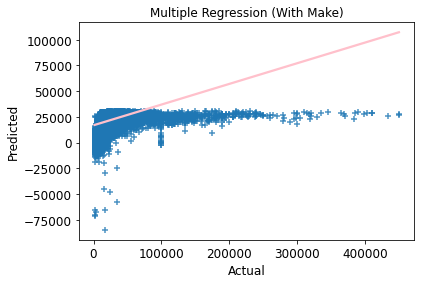

Accuracy of the model is 20.34%
Root Mean Square Error is 11742.28 Dollar


In [110]:
fig, ax = plt.subplots()
sns.regplot(x=y_test, y=y_pred_linear, ci=None, marker='+', line_kws={'color':'pink'}, ax=ax)
plot_detail('Multiple Regression (With Make)', 12, 'Actual', 'Predicted', ax)
plt.show()
print("Accuracy of the model is {:.2%}".format(r2_linear_make))
print("Root Mean Square Error is {:.2f} Dollar".format(RMSE_linear))

#### Decision Tree Regression

In [111]:
from sklearn.tree import DecisionTreeRegressor 

dtree = DecisionTreeRegressor(random_state = 0)
dtree.fit(X, y)

y_pred_dtree = dtree.predict(X_test)

In [112]:
# R2 Score
r2_dtree_make = r2_score(y_test, y_pred_dtree)
# RMSE
RMSE_dtree = np.sqrt(MSE(y_test, y_pred_dtree))

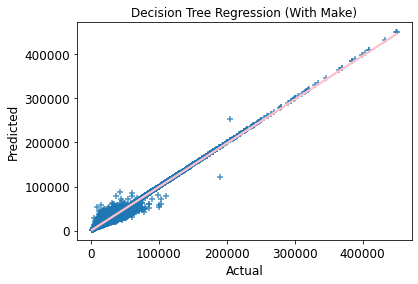

Accuracy of the model is 99.02%
Root Mean Square Error is 1305.15 Dollar


In [113]:
fig, ax = plt.subplots()
sns.regplot(x=y_test, y=y_pred_dtree, ci=None, marker='+', line_kws={'color':'pink'}, ax=ax)
plot_detail('Decision Tree Regression (With Make)', 12, 'Actual', 'Predicted', ax)
plt.show()
print("Accuracy of the model is {:.2%}".format(r2_dtree_make))
print("Root Mean Square Error is {:.2f} Dollar".format(RMSE_dtree))

#### Random Forest Regression

In [114]:
from sklearn.ensemble import RandomForestRegressor

rforest = RandomForestRegressor(n_estimators=10, random_state=0)
rforest.fit(X, y)

y_pred_rforest = rforest.predict(X_test)

In [115]:
# R2 Score
r2_rforest_make = r2_score(y_test, y_pred_rforest)

# RMSE
RMSE_rforest = np.sqrt(MSE(y_test, y_pred_rforest))

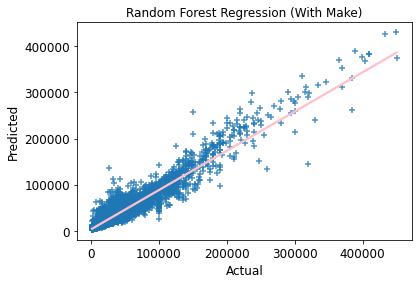

Accuracy of the model is 90.11%
Root Mean Square Error is 4136.49 Dollar


In [116]:
fig, ax = plt.subplots()
sns.regplot(x=y_test, y=y_pred_rforest, ci=None, marker='+', line_kws={'color':'pink'}, ax=ax)
plot_detail('Random Forest Regression (With Make)', 12, 'Actual', 'Predicted', ax)
plt.show()

print("Accuracy of the model is {:.2%}".format(r2_rforest_make))
print("Root Mean Square Error is {:.2f} Dollar".format(RMSE_rforest))

### Without Make Variable

In [117]:
# Preprocessing Data
df_numerized2 = df_numerized.drop(['Make'], axis=1)

Xn = df_numerized2.drop(['Price'], axis=1)
yn = df_numerized2['Price']

scaler = StandardScaler()
Xn[Xn.columns[:]] = scaler.fit_transform(Xn)
Xn.sample(5)

,Year,Mileage,Region
Vehicle_ID,,,
956914,-0.965785,2.997923,-0.354523
71118,1.081936,-1.061433,-0.914378
212701,0.204341,-0.721571,1.325042
255862,1.081936,-1.156556,-1.474233
565277,0.789404,-0.402228,-0.354523


In [118]:
from sklearn.model_selection import train_test_split

Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, train_size=0.75, random_state=0)
print(f'Train X dataset shape: {Xn_train.shape} \nTest X dataset shape: {Xn_test.shape}')
print(f'Train y dataset shape: {yn_train.shape} \nTest y dataset shape: {yn_test.shape}')

Train X dataset shape: (785365, 3) 
Test X dataset shape: (261789, 3)
Train y dataset shape: (785365,) 
Test y dataset shape: (261789,)


#### Multiple Regression Model

In [119]:
# Fit Multiple Regression Model
linear2 = linear_model.LinearRegression()
linear2.fit(Xn, yn)

yn_pred_linear = linear2.predict(Xn_test)

In [120]:
# R2 Score
r2_linear = r2_score(yn_test, yn_pred_linear)
# RMSE
RMSE_linear2 = np.sqrt(MSE(yn_test, yn_pred_linear))

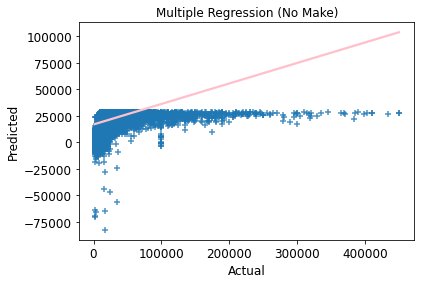

Accuracy of the model is 19.54%
Root Mean Square Error is 11800.81 Dollar


In [121]:
fig, ax = plt.subplots()
sns.regplot(x=yn_test, y=yn_pred_linear, ci=None, marker='+', line_kws={'color':'pink'}, ax=ax)
plot_detail('Multiple Regression (No Make)', 12, 'Actual', 'Predicted', ax)
plt.show()

print("Accuracy of the model is {:.2%}".format(r2_linear))
print("Root Mean Square Error is {:.2f} Dollar".format(RMSE_linear2))

#### Decision Tree Regression

In [122]:
dtree2 = DecisionTreeRegressor(random_state = 0)
dtree2.fit(Xn, yn)

yn_pred_dtree = dtree2.predict(Xn_test)

In [123]:
# R2 Score
r2_dtree = r2_score(yn_test, yn_pred_dtree)
# RMSE
RMSE_dtree2 = np.sqrt(MSE(yn_test, yn_pred_dtree))

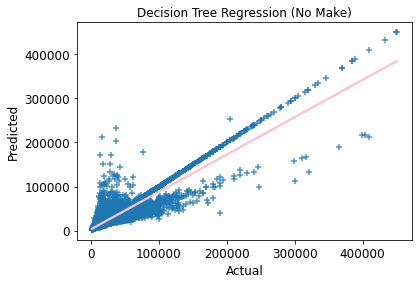

Accuracy of the model is 84.64%
Root Mean Square Error is 5156.00 Dollar


In [124]:
fig, ax = plt.subplots()
sns.regplot(x=yn_test, y=yn_pred_dtree, ci=None, marker='+', line_kws={'color':'pink'}, ax=ax)
plot_detail('Decision Tree Regression (No Make)', 12, 'Actual', 'Predicted', ax)
plt.show()

print("Accuracy of the model is {:.2%}".format(r2_dtree))
print("Root Mean Square Error is {:.2f} Dollar".format(RMSE_dtree2))

#### Random Forest Regression

In [125]:
rforest2 = RandomForestRegressor(n_estimators=10, random_state=0)
rforest2.fit(Xn, yn)

yn_pred_rforest = rforest2.predict(Xn_test)

In [126]:
# R2 Score
r2_rforest = r2_score(yn_test, yn_pred_rforest)
# RMSE
RMSE_rforest2 = np.sqrt(MSE(yn_test, yn_pred_rforest))

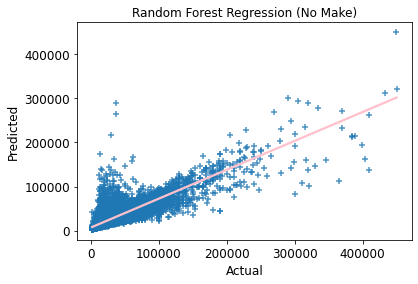

Accuracy of the model is 71.82%
Root Mean Square Error is 6983.68 Dollar


In [127]:
fig, ax = plt.subplots()
sns.regplot(x=yn_test, y=yn_pred_rforest, ci=None, marker='+', line_kws={'color':'pink'}, ax=ax)
plot_detail('Random Forest Regression (No Make)', 12, 'Actual', 'Predicted', ax)
plt.show()

print("Accuracy of the model is {:.2%}".format(r2_rforest))
print("Root Mean Square Error is {:.2f} Dollar".format(RMSE_rforest2))

### Compare between Model

In [128]:
# With make columns
all_R2_make = [r2_linear_make, r2_dtree_make, r2_rforest_make]
all_RMSE_make = [RMSE_linear, RMSE_dtree, RMSE_rforest]

# No make columns
all_R2 = [r2_linear, r2_dtree, r2_rforest]
all_RMSE = [RMSE_linear2, RMSE_dtree2, RMSE_rforest2]

compare_make = pd.DataFrame(zip(all_R2_make, all_RMSE_make), columns=['R2 Score (With make)', 'RMSE (With make)'],
        index=['Multiple Regression', 'Decision Tree Regression', 'Random Forest Regression'])
compare_make

,R2 Score (With make),RMSE (With make)
Multiple Regression,0.203382,11742.284161
Decision Tree Regression,0.990158,1305.148564
Random Forest Regression,0.901143,4136.491387


In [129]:
compare = pd.DataFrame(zip(all_R2, all_RMSE), columns=['R2 Score (No make)', 'RMSE (No make)'],
        index=['Multiple Regression', 'Decision Tree Regression', 'Random Forest Regression'])
compare

,R2 Score (No make),RMSE (No make)
Multiple Regression,0.195422,11800.805630
Decision Tree Regression,0.846407,5156.004678
Random Forest Regression,0.718218,6983.675706


The best Model for predicting car price is Decision Tree Regression Model without removing the Make variable